In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
rawdata = pd.read_csv("coronatweet_features.csv")
rawdata["econ_cum"] = rawdata["contain_econ"].cumsumum()

In [12]:
rawdata.head()

,date,contain_econ,Confirmed,Deaths,Recovered,econ_cum
0,2020-01-30,17,8142,171,135,17
1,2020-01-31,6,9814,213,214,23
2,2020-02-01,2,11910,259,275,25
3,2020-02-02,1,16651,361,463,26
4,2020-02-03,1,19742,425,614,27


In [14]:
lineregdata = rawdata[["Confirmed", "econ_cum"]]
lineregdata.head()

,Confirmed,econ_cum
0,8142,17
1,9814,23
2,11910,25
3,16651,26
4,19742,27


In [33]:
X = rawdata["Confirmed"].values.reshape(-1,1)
y = rawdata["econ_cum"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
regr = LinearRegression()  
regr.fit(X_train, y_train) #training the algorithm

# Make predictions using the testing set
y_pred = regr.predict(X_test)


In [35]:
#To retrieve the intercept:
print(regr.intercept_)
# The coefficients
print(regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

[-375.0491357]
[[0.00696025]]
Mean squared error: 57377.22
Coefficient of determination: 0.83


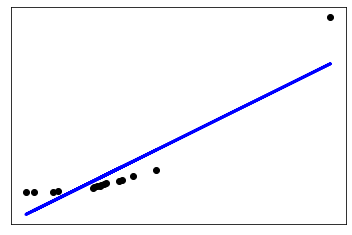

In [36]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()